In [3]:
import pandas as pd 
import numpy as np 
from scipy.optimize import minimize 
import matplotlib.pyplot as plt 
from utiles import * 
df = pd.read_csv('ARP_Returns.csv')
df_norm, df_return = cal_return(df)

In [4]:
df_return.columns

Index(['Date', 'equity_momentum', 'equity_low_beta', 'equity_quality',
       'commodity_carry', 'commodity_curve', 'credit_curve', 'credit_carry',
       'fx_carry', 'fx_value', 'interest_rate_spread', 'interest_rate_curve',
       'equity_trend', 'fx_trend', 'commodity_trend', 'interest_rate_trend',
       'commodity_volatility_carry', 'interest_rate_volatility_carry',
       'equity_volatility_carry', 'cot', 'merger_arb'],
      dtype='object')

('2009-01-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio')
('2015-09-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio')
('2017-09-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio')
CPU times: user 22.1 s, sys: 171 ms, total: 22.2 s
Wall time: 11.5 s


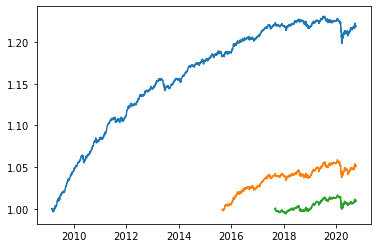

In [5]:
%%time
settings = [
            ('2009-01-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio'), 
            ('2015-09-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio'),
            ('2017-09-01', 0.1, 0, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'sharpe_ratio')
           ]

result = {} 

for i, config in enumerate(settings):
    print(config)
    result[i] = portfolio_optimisation(df_return, 
                                            cutoff_date=config[0],
                                            upper_bound=config[1],
                                            lower_bound=config[2],
                                            drop_strategy=config[3],
                                            target=config[4])

In [9]:
print(np.maximum(result[2]['weights'] - 0.02, 0), np.minimum(result[2]['weights'] + 0.02, 0.1))

[0.         0.08       0.08       0.         0.08       0.08
 0.         0.08       0.08       0.04555698 0.         0.
 0.08       0.         0.01444301 0.08       0.08      ] [0.02       0.1        0.1        0.02       0.1        0.1
 0.02       0.1        0.1        0.08555698 0.02       0.02
 0.1        0.02       0.05444301 0.1        0.1       ]


In [7]:
bound_1 = [(lower,upper) for lower, upper in zip(np.maximum(result[0]['weights'] - 0.02, 0), 
                                                 np.minimum(result[0]['weights'] + 0.02, 0.1))]
bound_2 = [(lower,upper) for lower, upper in zip(np.maximum(result[1]['weights'] - 0.02, 0), 
                                                 np.minimum(result[1]['weights'] + 0.02, 0.1))]
bound_3 = [(lower,upper) for lower, upper in zip(np.maximum(result[2]['weights'] - 0.02, 0), 
                                                 np.minimum(result[2]['weights'] + 0.02, 0.1))]

In [10]:
bound_3

[(0.0, 0.02),
 (0.08, 0.1),
 (0.08, 0.1),
 (0.0, 0.02),
 (0.07999999995434776, 0.1),
 (0.08, 0.1),
 (0.0, 0.02),
 (0.08, 0.1),
 (0.08, 0.1),
 (0.04555698339090872, 0.08555698339090873),
 (0.0, 0.02),
 (0.0, 0.02),
 (0.08, 0.1),
 (0.0, 0.02),
 (0.014443014110131661, 0.054443014110131666),
 (0.08, 0.1),
 (0.08, 0.1)]

('2009-01-01', [(0.0, 0.02962044044812786), (0.07999999999995645, 0.1), (0.015193515186899046, 0.05519351518689905), (0.0, 0.020000000000059946), (0.07999999999997313, 0.1), (0.07999999999994503, 0.1), (0.07999999999999481, 0.1), (0.023272188007849883, 0.06327218800784988), (0.07999999999995293, 0.1), (0.004073291085164413, 0.04407329108516442), (0.0, 0.020000000000023197), (0.0, 0.020000000000044156), (0.07999999999996679, 0.1), (0.007008767198695719, 0.04700876719869572), (0.04083179807332876, 0.08083179807332877), (0.07999999999997169, 0.1), (0.08, 0.1)], ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'diversification_ratio')
('2015-09-01', [(0.0, 0.02000000004164238), (0.0799999996659982, 0.1), (0.07999999995506121, 0.1), (0.0, 0.020000000074698238), (0.07999999999413285, 0.1), (0.07999999993632576, 0.1), (0.0, 0.020000000046865057), (0.07999999999556473, 0.1), (0.07999999999318302, 0.1), (0.0, 0.02000000033933538), (0.0, 0.020000000040840415), (0.0, 0.0200000000183666

ValueError: `x0` violates bound constraints.

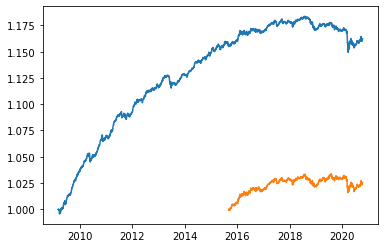

In [8]:
settings_ = [
            ('2009-01-01', bound_1, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'diversification_ratio'), 
            ('2015-09-01', bound_2, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'diversification_ratio'),
            ('2017-09-01', bound_3, ['equity_trend', 'fx_value', 'commodity_volatility_carry'], 'diversification_ratio')
           ]

result_ = {} 

for i, config in enumerate(settings_):
    print(config)
    result_[i] = portfolio_optimisation(df_return, 
                                            cutoff_date=config[0],
                                            input_bound=config[1],
                                            drop_strategy=config[2],
                                            target=config[3])

In [ ]:
result_[0]